#  End to End Project - Forecast Sales Quantities (Stretch Goal)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from sklearn import preprocessing

#read Sales info file
sales_path= '/cxldata/datasets/project/sales_historical_sales_value.csv'
df_sales = pd.read_csv(sales_path)

#rename ID1 and ID to properly for understanding
df_sales= df_sales.rename(columns={'ID1': 'store_id', 'ID2': 'prod_id'})
df_sales.head()
#df['ID2'].value_counts()


,store_id,prod_id,time,value
0,1,2,11/13/2010 12:00:00 AM,130
1,1,2,11/20/2010 12:00:00 AM,222
2,1,2,11/27/2010 12:00:00 AM,166
3,1,2,12/4/2010 12:00:00 AM,174
4,1,2,12/11/2010 12:00:00 AM,236


In [42]:
#convert data to proper format
df_sales['time']= pd.to_datetime(df_sales['time'])

In [43]:
df_sales

,store_id,prod_id,time,value
0,1,2,2010-11-13,130
1,1,2,2010-11-20,222
2,1,2,2010-11-27,166
3,1,2,2010-12-04,174
4,1,2,2010-12-11,236
...,...,...,...,...
2454,15,1,2013-11-30,140
2455,15,1,2013-12-07,186
2456,15,1,2013-12-14,184
2457,15,1,2013-12-21,220


In [44]:
#convert time in income table to proper format
income_path = '/cxldata/datasets/project/sales_disposable_personal_income.csv'
df_income= pd.read_csv(income_path)
df_income['time']= pd.to_datetime(df_income['time'])
df_income

,time,value
0,2009-11-07,10886.9
1,2009-11-14,10886.9
2,2009-11-21,10886.9
3,2009-11-28,10886.9
4,2009-12-05,10924.7
...,...,...
216,2013-12-28,11696.6
217,2014-01-04,11753.2
218,2014-01-11,11753.2
219,2014-01-18,11753.2


In [45]:
#check for null values
print(df_sales.isna().sum(),'\n')
print(df_income.isna().sum())

store_id    0
prod_id     0
time        0
value       0
dtype: int64 

time     0
value    0
dtype: int64


In [46]:
# Lets consider only sale greater than 20

df_sales=df_sales[df_sales.value>20]
df_sales


,store_id,prod_id,time,value
0,1,2,2010-11-13,130
1,1,2,2010-11-20,222
2,1,2,2010-11-27,166
3,1,2,2010-12-04,174
4,1,2,2010-12-11,236
...,...,...,...,...
2454,15,1,2013-11-30,140
2455,15,1,2013-12-07,186
2456,15,1,2013-12-14,184
2457,15,1,2013-12-21,220


In [47]:
#Lets merge tables by time

joined_df = pd.merge(df_sales, df_income, on = 'time')

joined_df

,store_id,prod_id,time,value_x,value_y
0,1,2,2010-11-13,130,11160.8
1,2,1,2010-11-13,142,11160.8
2,3,1,2010-11-13,70,11160.8
3,4,2,2010-11-13,314,11160.8
4,5,1,2010-11-13,108,11160.8
...,...,...,...,...,...
2454,11,1,2010-11-06,122,11160.8
2455,12,1,2010-11-06,1270,11160.8
2456,13,1,2010-11-06,958,11160.8
2457,14,1,2010-11-06,412,11160.8


In [48]:
# rename columns in new df

joined_df= joined_df.rename(columns= {'value_x': 'sale','value_y': 'income'})

joined_df

,store_id,prod_id,time,sale,income
0,1,2,2010-11-13,130,11160.8
1,2,1,2010-11-13,142,11160.8
2,3,1,2010-11-13,70,11160.8
3,4,2,2010-11-13,314,11160.8
4,5,1,2010-11-13,108,11160.8
...,...,...,...,...,...
2454,11,1,2010-11-06,122,11160.8
2455,12,1,2010-11-06,1270,11160.8
2456,13,1,2010-11-06,958,11160.8
2457,14,1,2010-11-06,412,11160.8


In [49]:
#split datetime to date, month, year.
joined_df['date']=joined_df['time'].dt.date
joined_df['month']= joined_df['time'].dt.month
joined_df['year']=joined_df['time'].dt.year
joined_df['year'].value_counts()


2011    795
2012    780
2013    765
2010    119
Name: year, dtype: int64

In [50]:
print(joined_df['income'].value_counts())

11709.3    75
11638.5    75
11627.6    75
11416.0    75
11586.8    75
11675.1    75
11340.8    75
11282.8    75
11297.4    75
11371.2    75
11584.7    75
12214.1    75
11742.7    60
11543.5    60
11487.6    60
11330.8    60
11611.6    60
11653.5    60
11877.2    60
11665.6    60
11329.3    60
11277.1    60
11612.5    60
11312.4    60
11725.6    60
11363.5    60
11696.6    60
11325.8    60
11239.0    60
11597.1    60
11562.5    60
11576.6    60
11709.1    60
11713.0    60
11609.4    60
11500.3    60
11329.0    60
11160.8    59
Name: income, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

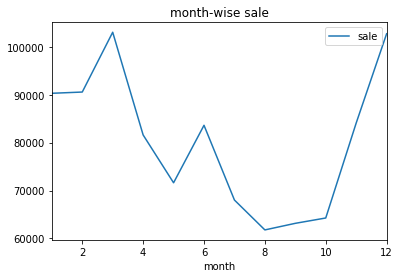

In [51]:
temp_df= joined_df.groupby('month')[['sale','income']].sum().reset_index()
temp_df2= joined_df.groupby('year')[['sale','income']].sum().reset_index()

temp_df.head()

temp_df.plot(x= 'month', y= 'sale', kind='line',title='month-wise sale')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

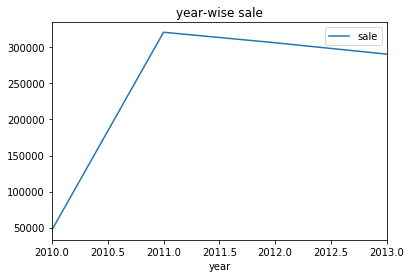

In [52]:
temp_df2.plot(x= 'year', y= 'sale', kind='line',title='year-wise sale')
plt.show


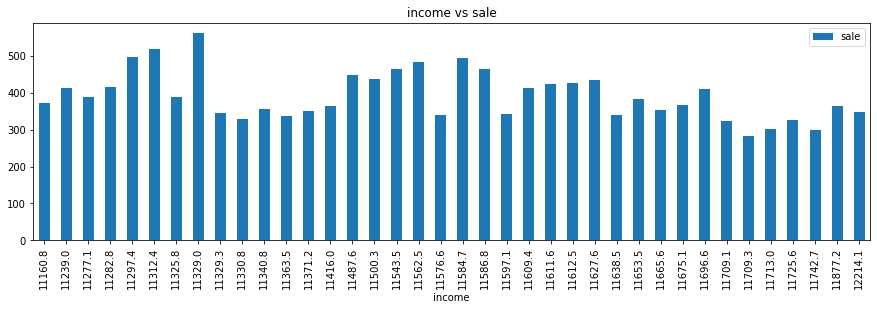

In [53]:
#income vs Sale
# Lets Calculate the average(mean) sale with respect to the income
# the below graph shows the mean sale by the respective income groups.

income_group_df= joined_df.groupby('income')[['sale']].mean().reset_index()
income_group_df
income_group_df.plot(x= 'income', y= 'sale', kind='bar',title='income vs sale', figsize=(15,4))

In [54]:
#normalize Data
income_group_df= joined_df.groupby('month')[['income','sale']].mean().reset_index()

x= income_group_df.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(x)
scaled_df= pd.DataFrame(scaled_df, columns=income_group_df.columns )
display(scaled_df)

,month,income,sale
0,0.000000,0.000000,0.785117
1,0.090909,0.247478,1.000000
2,0.181818,0.368440,0.933321
3,0.272727,0.273906,0.545690
4,0.363636,0.394915,0.435138
5,0.454545,0.577572,0.436782
6,0.545455,0.465989,0.171657
7,0.636364,0.592976,0.000000
8,0.727273,0.649979,0.037877
9,0.818182,0.620113,0.068542


<function matplotlib.pyplot.show(*args, **kw)>

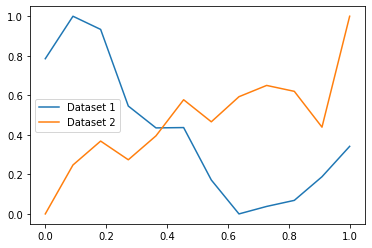

In [55]:
temp_df= scaled_df.groupby('month')[['sale','income']].mean().reset_index()

plt.plot(scaled_df.month, scaled_df.sale)#, kind='line',title='month-wise sale')
plt.plot(scaled_df.month, scaled_df.income)#, kind='line',title='month-wise income')
plt.legend(["Dataset 1", "Dataset 2"])

plt.show

In [56]:
#Split Train and Test data

In [57]:
train_data= joined_df[joined_df['year']>=2012]
train_data

,store_id,prod_id,time,sale,income,date,month,year
900,1,2,2012-01-07,274,11500.3,2012-01-07,1,2012
901,2,1,2012-01-07,164,11500.3,2012-01-07,1,2012
902,3,1,2012-01-07,56,11500.3,2012-01-07,1,2012
903,4,2,2012-01-07,372,11500.3,2012-01-07,1,2012
904,5,1,2012-01-07,184,11500.3,2012-01-07,1,2012
...,...,...,...,...,...,...,...,...
2440,11,1,2013-12-28,182,11696.6,2013-12-28,12,2013
2441,12,1,2013-12-28,1470,11696.6,2013-12-28,12,2013
2442,13,1,2013-12-28,1248,11696.6,2013-12-28,12,2013
2443,14,1,2013-12-28,694,11696.6,2013-12-28,12,2013


In [58]:
test_data=  joined_df[joined_df['year']<2012]
test_data

,store_id,prod_id,time,sale,income,date,month,year
0,1,2,2010-11-13,130,11160.8,2010-11-13,11,2010
1,2,1,2010-11-13,142,11160.8,2010-11-13,11,2010
2,3,1,2010-11-13,70,11160.8,2010-11-13,11,2010
3,4,2,2010-11-13,314,11160.8,2010-11-13,11,2010
4,5,1,2010-11-13,108,11160.8,2010-11-13,11,2010
...,...,...,...,...,...,...,...,...
2454,11,1,2010-11-06,122,11160.8,2010-11-06,11,2010
2455,12,1,2010-11-06,1270,11160.8,2010-11-06,11,2010
2456,13,1,2010-11-06,958,11160.8,2010-11-06,11,2010
2457,14,1,2010-11-06,412,11160.8,2010-11-06,11,2010


In [59]:
X_train= train_data[['store_id','prod_id','month','year','income']]
y_train= train_data[['sale']]

X_test = test_data[['store_id','prod_id','month','year','income']]
y_test = test_data[['sale']]

In [75]:
y_test=y_test.head(900)

In [76]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth=6, random_state=1)
RF.fit(X_train, y_train)


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [77]:
yhat= RF.predict(X_test.values)

In [83]:
yhat=pd.DataFrame(yhat)
yhat=yhat.head(900)

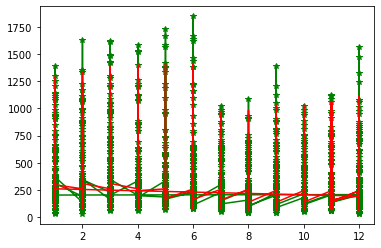

In [64]:
plt.plot(X_train[['month']],y_train,color ='green', marker="*")
plt.plot(X_test[['month']],RF.predict(X_test), color= 'red')
plt.show()

,sale,X,pred
0,130,11,242.583615
1,142,11,160.742549
2,70,11,65.256725
3,314,11,301.391845
4,108,11,128.738938
...,...,...,...
895,174,12,185.510178
896,1090,12,1112.282222
897,896,12,854.372320
898,702,12,598.235850


In [66]:
newdf.insert(1,'pred', yhat, False)

In [67]:
newdf.insert(1,'X',X_test['month'], True)

In [85]:

y_test

,sale,X,pred
0,130,11,242.583615
1,142,11,160.742549
2,70,11,65.256725
3,314,11,301.391845
4,108,11,128.738938
...,...,...,...
895,174,12,185.510178
896,1090,12,1112.282222
897,896,12,854.372320
898,702,12,598.235850


<function matplotlib.pyplot.show(*args, **kw)>

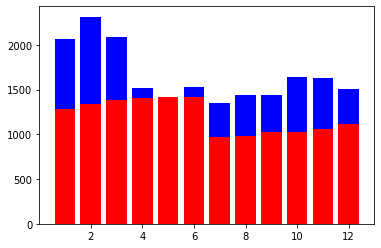

In [33]:
plt.bar(newdf['X'],newdf['sale'], color='blue')
plt.bar(newdf['X'],newdf['pred'],color='red')
plt.show

# RMSE

In [91]:
from sklearn.metrics import mean_squared_error
import math

MSE= mean_squared_error(y_test.sale, yhat)
RMSE = math.sqrt(MSE)

In [92]:
RMSE

154.13717760920775